# Dataset creation

This is a tutorial notebook to show how to create and format your data to perform trainign and inference using the PlaNet model. A dataset of equibria for an ITER-like device can be found in [this repo](https://github.com/matteobonotto/ITERlike-equilibrium-dataset?tab=readme-ov-file).

PlaNet can be used to perform equilibrium reconstruction in a structured grid, so the data needs to have information about the grid geometry, the equilibrium like the flux map and Grad-Shafranov operator (this is optional and needed only if physics-informed reconstruction is performed), and the measurements (e.g. magnetic measures, currents flowing in the active coils, plasma core informations).

PlaNet expects an `.h5` dataset with the following keys:
- `RR_grid`, `ZZ_grid`, both are 2d `np.ndarray` of dimension `(nr, nz)` with the $r$ and $z$ coordinates of the grid (use the [numpy.meshgrid](https://numpy.org/doc/2.2/reference/generated/numpy.meshgrid.html) format)
- `flux`, a `np.ndarray` of dimension `(nsample, nr, nz)`, where each sample is magnetic flux (it can be normalized or not)
- `rhs` (optional), a `np.ndarray` of dimension `(nsample, nr, nz)`, where each sample is the Right-Hand Side of the GS equation (see RHS of requation 12 in https://doi.org/10.1016/j.fusengdes.2024.114193) It is used inly if the flag `is_physics_informed` is set to true during training.
- `measures` a `np.ndarray` of dimension `(nsample, nmeasures)` with any kind of measures. In this exmple we will consider (i) magnetic measures coming from pickup coils and flux loops, currents flowing in coils and plasma $p$ profile (this last one can be substitutes, for example, with a vector of coefficients if a parametrization is used).

A sample of such data can be seen in the folder `planet/tests/data/raw`.

In [12]:
import numpy as np

from planet.plot import contourf
from planet.utils import read_h5_numpy, write_h5

In [ ]:
# Load the data and format it into a dictionary
path = '../planet/tests/data/raw'

RR_grid = np.load(path + '/RR_grid.npy')
ZZ_grid = np.load(path + '/ZZ_grid.npy')
flux = np.load(path + '/flux.npy')
rhs = np.load(path + '/rhs.npy') # this is optional!!
coils_current = np.load(path + '/coils_current.npy')
mag_measures = np.load(path + '/mag_measures.npy')
p_profile = np.load(path + '/p_profile.npy')

# put together all the desired inputs in the measures variable
measures = np.column_stack(
    [mag_measures, coils_current, p_profile]
)

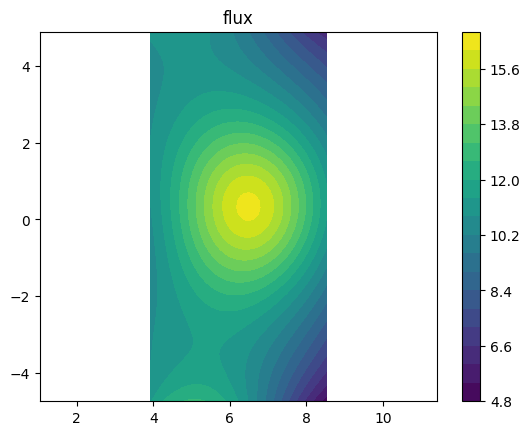

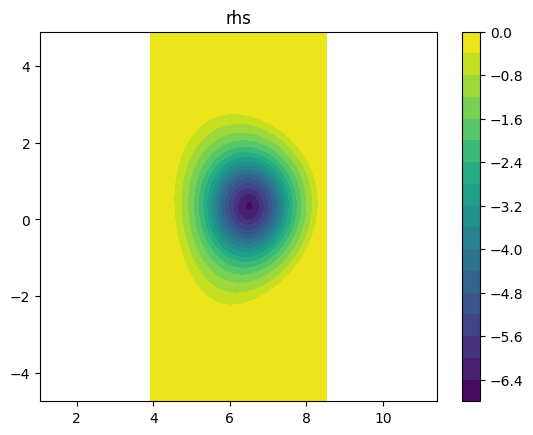

In [17]:
# This is an example of flux map and rhs
contourf(RR=RR_grid, ZZ=ZZ_grid, z=flux[0,...], title='flux')
contourf(RR=RR_grid, ZZ=ZZ_grid, z=rhs[0,...], title='rhs')

In [22]:
# create the dictionary and save it to a .h5 dataset
data = {
    'RR_grid': RR_grid,
    'ZZ_grid': ZZ_grid,
    'flux': flux,
    'rhs': rhs,
    'measures': measures,
}

for k, v in data.items():
    print(f'{k}: shape -> {v.shape}')
    
# 
print('\nSaving dataset')
write_h5(
    data=data,  filename='planet_sample_dataset'
)
print('Done!')

RR_grid: shape -> (64, 64)
ZZ_grid: shape -> (64, 64)
flux: shape -> (64, 64, 64)
rhs: shape -> (64, 64, 64)
measures: shape -> (64, 302)

Saving dataset
Done!
